In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [2]:
func = lambda x: 0.5*np.linalg.norm(A @ x - b)**2
grad = lambda x: A.T @ (A @ x - b)

In [3]:
n = 10
A = np.eye(n)*np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [39]:
def ternary_search(xk, zk, func):
    a = 0.
    b = 1. 
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(xk*c+zk*(1-c)) >= func(xk*d+zk*(1-d)):
            a = c
        else:
            b = d 
    print((b + a)/2)
    return (b+a)/2        

In [40]:
def a_next(ak, L):
    return 1 / L * 0.5 + (1 / L**2 * 0.25 + ak**2)**0.5

In [41]:
 def y_next(xk, zk):
    return ternary_search(xk, zk, func)

In [42]:
def x_next(xk, grad, ak_next, yk_next):
    return xk - ak_next * grad(yk_next)

In [43]:
def fast_grad_step_v3(ak_next, xk_next, a_bigk, zk):
    return (ak_next * xk_next + a_bigk * zk) / (a_bigk + ak_next)
        
        

In [47]:
xk = x0
zk= x0
yk = x0
L = np.amax(np.linalg.eigh(A.T @ A)[0])
ak = 1 / L
a_bigk = ak
res = [func(xk)]
while True:
#for i in range(10):
    ak = a_next(ak, L) 
    alpha = ternary_search(xk, zk, func)
    yk = xk * alpha + zk * (1 - alpha)
    xk = x_next(xk, grad, ak, yk)
    zk = xk * alpha + zk * (1 - alpha)
    a_bigk += ak
    res.append(func(zk))
    
#print(zk)
    if abs(res[-1] - res[-2]) < 1e-9:
        break

0.9996616802577005
0.0003383197422994323
0.7265596038210564
0.9996616802577005
0.0003383197422994323
0.28597664590733607
0.0907614568624428
0.2703139120760337
0.3735948874918693
0.0003383197422994323
0.2930717791747973
0.3590199020165915
0.13253300085530584
0.020391033061754257
0.039900254217065945
0.4602305222943436
0.0003383197422994323
0.11477955674151245
0.002579688035033171
0.0006766394845988645
0.0006766394845988645
0.0008457993557485806
0.0011841190980480128
0.001437858904772587
0.002579688035033171
0.0045567440290954775
0.012213871321606846
0.07962977920870878
0.07166770160160527
0.14409897665479432
0.0003383197422994323
0.10903456373470222
0.04741547884422807
0.053431887542736534
0.10043582387817385
0.001437858904772587
0.005841301800638635
0.0040069744478589
0.0019876284860091643
0.0010995391624731548
0.0011841190980480128
0.0006766394845988645
0.0003383197422994323
0.0006766394845988645
0.0003383197422994323
0.0003383197422994323
0.0003383197422994323
0.0003383197422994323
0

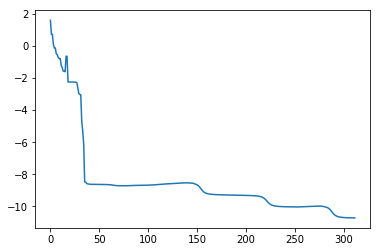

In [48]:
plt.plot(np.log(res))
plt.show()